In [1]:
import pandas as pd 
driver_information_df = pd.read_csv ( "/data/project/Meningioma/91.Lollipop/driver_information.txt", sep = "\t", names = ["CHR", "POS", "REF", "ALT", "HUGO_SYMBOL", "VARIANT_TYPE", "Sample_ID", "DBSNP", "CODING", "PROTEIN", "AMINO_ACIDS" ] )  # , name = ["CHR", "POS", "REF", "ALT", "HUGO_SYMBOL", "VARIANT_TYPE" ]
driver_information_df ["colname"] = driver_information_df ["CHR"] + ":" + driver_information_df["POS"].astype(str) + "(" + driver_information_df["HUGO_SYMBOL"] + ")"
driver_information_df ["new_colname"] = driver_information_df ["HUGO_SYMBOL"] + " (" + driver_information_df ["CODING"] + ")"
driver_information_df

/opt/Yonsei/python/3.8.1/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,CHR,POS,REF,ALT,HUGO_SYMBOL,VARIANT_TYPE,Sample_ID,DBSNP,CODING,PROTEIN,AMINO_ACIDS,colname,new_colname
0,chr22,29636758,G,A,NF2,SNP,190426,rs1555986860,c.122G>A,W41*,Trp41Ter,chr22:29636758(NF2),NF2 (c.122G>A)
1,chr22,29604113,G,C,NF2,SNP,220930,.,c.114+1G>C,?,?,chr22:29604113(NF2),NF2 (c.114+1G>C)
2,chr22,29604050,CA,C,NF2,Del,221026,.,c.54del,Q18Hfs*7,Gln18HisfsTer7,chr22:29604050(NF2),NF2 (c.54del)
3,chr22,29639185,G,GA,NF2,Ins,221102,.,c.337dup,I113Nfs*17,Ile113AsnfsTer17,chr22:29639185(NF2),NF2 (c.337dup)
4,chr16,2175609,A,G,TRAF7,SNP,221202,.,c.1613A>G,Y538C,Tyr538Cys,chr16:2175609(TRAF7),TRAF7 (c.1613A>G)
5,chr14,104780214,C,T,AKT1,SNP,221202,rs121434592,c.49G>A,E17K,Glu17Lys,chr14:104780214(AKT1),AKT1 (c.49G>A)
6,chr22,29604167,A,AGGTT,NF2,Ins,230127,.,c.114+56_114+59dup,?,?,chr22:29604167(NF2),NF2 (c.114+56_114+59dup)
7,chr9,107487067,T,G,KLF4,SNP,"230303,230405",.,c.1225A>C,K409Q,Lys409Gln,chr9:107487067(KLF4),KLF4 (c.1225A>C)
8,chr16,2176145,A,G,TRAF7,SNP,"230303,230405",.,c.1843A>G,K615E,Lys615Glu,chr16:2176145(TRAF7),TRAF7 (c.1843A>G)
9,chr22,29661335,AGGAGGTAGGACATGTGTGTAC,A,NF2,Del,230323,.,c.807_810+17del,?,?,chr22:29661335(NF2),NF2 (c.807_810+17del)


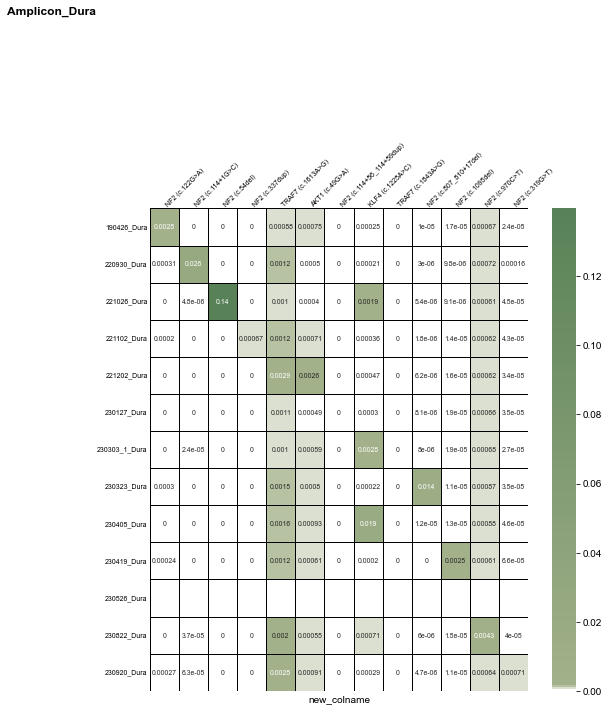

In [7]:
def HEATMAP_VISUALIZATION (vaf_df, title, Output_filename, **kwargs):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcl
    import numpy as np
    import pandas as pd
    from matplotlib.colors import LinearSegmentedColormap

    plt.rcParams["font.family"] = 'arial'

    DENOMINATOR = 1

    # # 곱하기 100해주기
    # vaf_df =  vaf_df  * 100
    # vaf_df =  vaf_df.applymap(lambda x: np.floor(x * 10) / 10)

    # Define the colors
    colors = [ "white", "#A3B18A", "#588157"]
    fig, ax = plt.subplots ( nrows = 1, ncols = 1, figsize =(9 / DENOMINATOR, 10 / DENOMINATOR))
    positions = [0, 0.01, 1]  # Define the positions for each color
    # Create the colormap
    cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, colors)))

    fig.subplots_adjust ( wspace = 0.4, bottom = 0.03, top = 0.7, left = 0.22, right = 0.95)
    fig.set_facecolor('white')

    sns.heatmap (vaf_df , cmap = cmap, linewidths = 0.5, linecolor = "black", annot = vaf_df, annot_kws={"size": 25 / np.sqrt(len(vaf_df))} )   # fmt=".2f", 
    fig.suptitle ( title, fontsize = 12, fontweight = "bold", ha = "left", x = 0 )
    ax.set_xticklabels( ax.get_xticklabels(), fontsize = 7, ha = 'left' )
    ax.tick_params(axis = 'x',  rotation = 45, pad = -2.5)
    ax.set_yticklabels( [ i.get_text().replace( "_Multiplex.sorted" , "" ) for i in ax.get_yticklabels()], fontsize = 5, va = 'center' )
    ax.tick_params(axis = 'y', pad = -1.5 )

    plt.tick_params(axis='both', which='major', labelsize = 7, left = False, labelbottom = False, bottom=False, top = False, labeltop=True)

    fig.savefig ( Output_filename, dpi = 300)


import argparse
import numpy as np
import pandas as pd
import random
import os, glob, copy, time
import pysam
import warnings
warnings.filterwarnings("ignore")

kwargs = {}
kwargs ["BAMTYPE"] = "Amplicon"

# import multiplex_amplicon
vaf_df_multiplex = pd.read_csv ( "/data/project/Meningioma/51.Amplicon/02.multiplex/07.pysam/multiplex_vaf_df.tsv", sep = "\t", index_col = 0 )
vaf_df_multiplex.index = vaf_df_multiplex.index.str.replace(".sorted", "")
new_index = vaf_df_multiplex.index.tolist()
vaf_df_multiplex.index = new_index
vaf_df_multiplex.loc["220930_Dura", "chr22:29604113(NF2)"] = 0.026
vaf_df_multiplex.columns = pd.merge ( pd.DataFrame ( vaf_df_multiplex.columns, columns = ["colname"] ),  driver_information_df, how = "inner").loc [ : , "new_colname"]

# import WES_dura
df_WES_dura = pd.read_csv ( "/data/project/Meningioma/07.pysam/Dura_vaf_df.tsv", sep = "\t", index_col = 0)
df_WES_dura = df_WES_dura.rename ( index = { "230303_Dura" : "230303_1_Dura", "230323_2_Dura" : "230323_Dura", "230405_2_Dura" : "230405_Dura" } )                 # Multiplex에는 230303_1_Dura라고 써있어서 어쩔 수 없이
df_WES_dura.columns = pd.merge ( pd.DataFrame ( df_WES_dura.columns, columns = ["colname"] ),  driver_information_df, how = "inner").loc [ : , "new_colname"]


df_WES_tumor = pd.read_csv ( "/data/project/Meningioma/07.pysam/Tumor_vaf_df.tsv", sep = "\t", index_col = 0)
df_WES_tumor = df_WES_tumor.rename ( index = { "230303_Tumor" : "230303_1_Tumor", "230323_2_Tumor" : "230323_Tumor", "230405_2_Tumor" : "230405_Tumor" } )                                              
df_WES_tumor.columns = pd.merge ( pd.DataFrame ( df_WES_tumor.columns, columns = ["colname"] ),  driver_information_df, how = "inner").loc [ : , "new_colname"]



# Single site amplicon seq  1줄씩 갈아끼기
for TISSUE in [ "221202_AKT1", "221202_TRAF7", "230405_KLF4", "230822_NF2"]:
    kwargs["TISSUE"] = TISSUE
    vaf_df_single =  pd.read_csv ( "/data/project/Meningioma/51.Amplicon/01.single/07.pysam/{}_vaf_df.tsv".format(kwargs["TISSUE"]), sep = "\t", index_col = 0 )
    vaf_df_single.index = vaf_df_single.index.str.replace (".sorted", "")
    vaf_df_single.columns = pd.merge ( pd.DataFrame ( vaf_df_single.columns, columns = ["colname"] ),  driver_information_df, how = "inner").loc [ : , "new_colname"]

    if TISSUE == "230405_KLF4":
        vaf_df_single = vaf_df_single[ ~vaf_df_single.index.isin( ["230303_1_Dura", "230303_2_Dura" ] ) ]
        vaf_df_single = vaf_df_single.rename ( index = { "230303_3_Dura" : "230303_1_Dura" } )        

    new_index = vaf_df_single.index.tolist()
    vaf_df_single.index = new_index

    
    
    # Replace values
    for CHRPOS in vaf_df_single.columns:
        for Sample_ID in vaf_df_single.index:
            vaf_df_multiplex.loc [ Sample_ID, CHRPOS] = vaf_df_single.loc [ Sample_ID, CHRPOS].astype (float)

# 중간에 nan으로 이루어진 row를 끼워넣기
vaf_df_multiplex_with_nan = pd.concat([ vaf_df_multiplex,
                                                                    pd.DataFrame([[np.nan] * vaf_df_multiplex.shape[1]], columns=vaf_df_multiplex.columns, index=["230127_Cortex"]), 
                                                                    pd.DataFrame([[np.nan] * vaf_df_multiplex.shape[1]], columns=vaf_df_multiplex.columns, index=["230526_Dura"]) ] )

# WES_dura 의 순서에 맞게 row를 정렬해주기
vaf_df_multiplex_with_nan = vaf_df_multiplex_with_nan.reindex (    [ str(i) for i in df_WES_dura.index ]   )

# Cortex, Ventricle은 제외해주기
vaf_df_multiplex_with_nan_CV = vaf_df_multiplex_with_nan[vaf_df_multiplex_with_nan.index.str.contains("Cortex|Ventricle")]
vaf_df_multiplex_with_nan = vaf_df_multiplex_with_nan[~vaf_df_multiplex_with_nan.index.str.contains("Cortex|Ventricle")]

HEATMAP_VISUALIZATION ( vaf_df_multiplex_with_nan, "Amplicon_Dura", "/data/project/Meningioma/51.Amplicon/02.multiplex/07.pysam/Dura_post_heatmap.pdf", **kwargs )

new_colname,NF2 (c.122G>A),NF2 (c.114+1G>C),NF2 (c.54del),NF2 (c.337dup),TRAF7 (c.1613A>G),AKT1 (c.49G>A),NF2 (c.114+56_114+59dup),KLF4 (c.1225A>C),TRAF7 (c.1843A>G),NF2 (c.807_810+17del),NF2 (c.1095del),NF2 (c.970C>T),NF2 (c.319G>T)
230920_Dura,2,2,2,2,1,1,0,2,0,2,2,2,0
230822_Dura,2,2,2,2,1,2,0,2,0,2,2,0,2
230526_Dura,2,2,2,2,2,2,2,2,2,2,2,2,2
230419_Dura,2,2,2,2,2,2,0,2,0,2,0,2,2
230405_Dura,2,2,2,2,1,1,0,0,0,2,2,2,2
230323_Dura,2,2,2,2,1,1,0,2,0,0,2,2,2
230303_1_Dura,2,2,2,2,2,2,0,1,0,2,2,2,2
230127_Dura,2,2,2,2,2,2,0,2,0,2,2,2,2
221202_Dura,2,2,2,2,0,0,0,2,0,2,2,2,2
221102_Dura,2,2,2,0,2,2,0,2,0,2,2,2,2


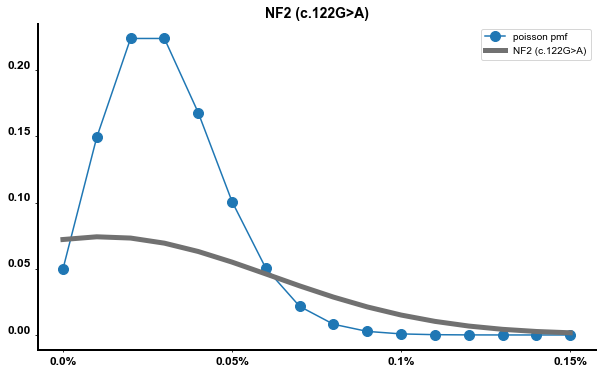

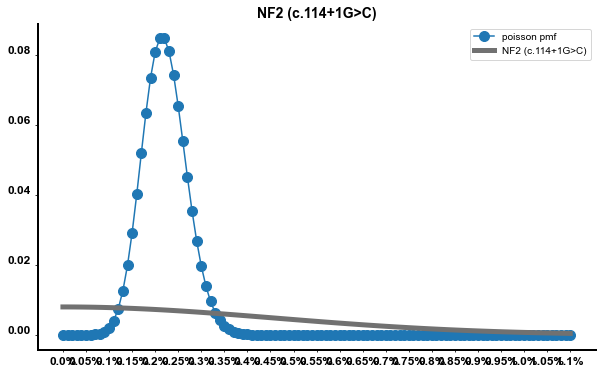

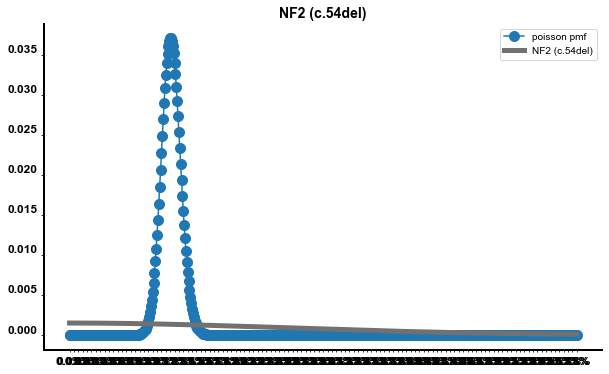

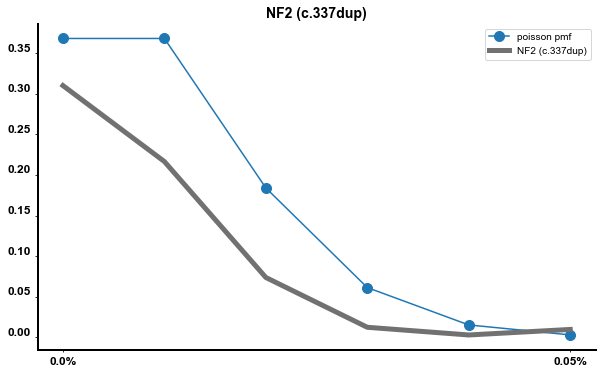

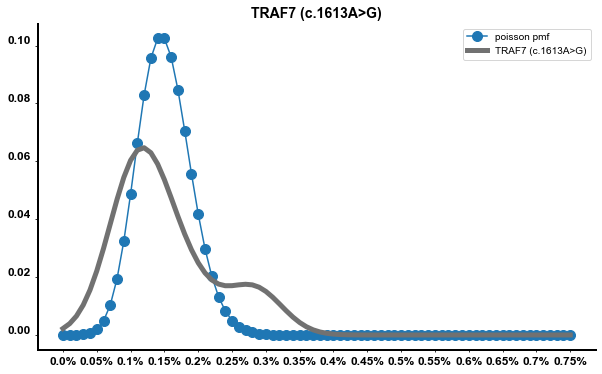

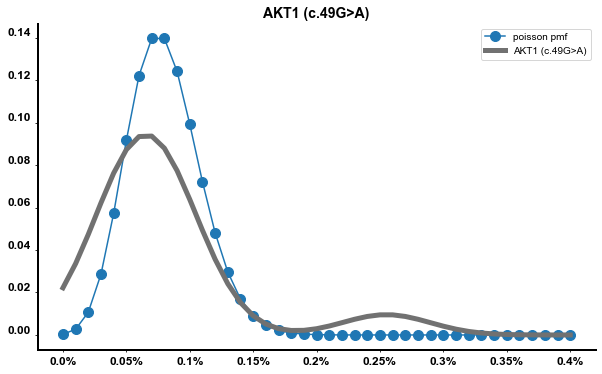

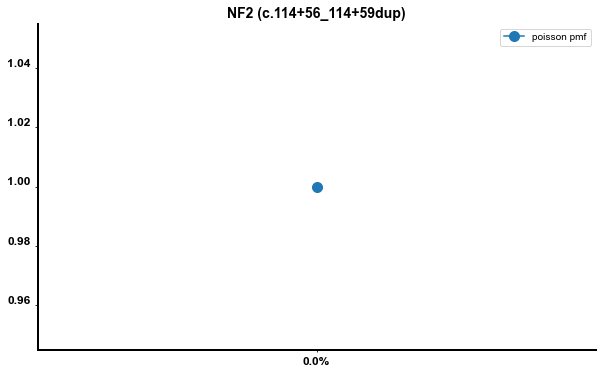

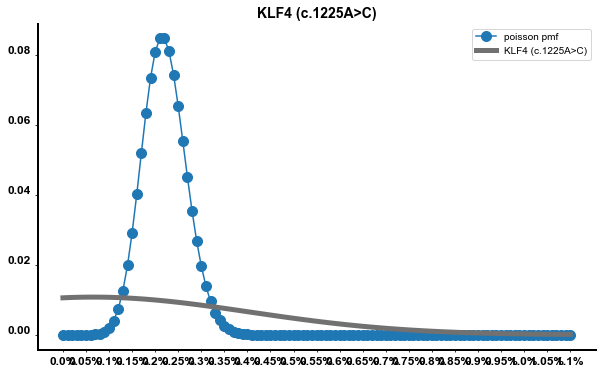

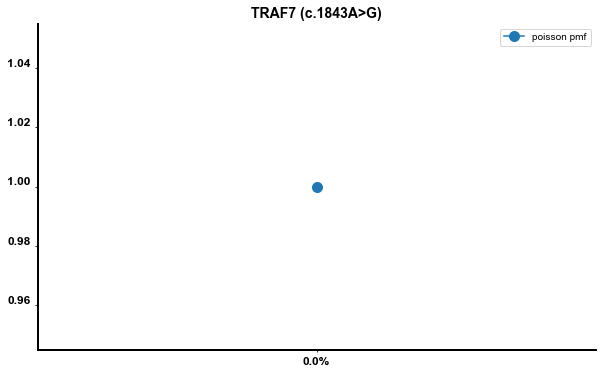

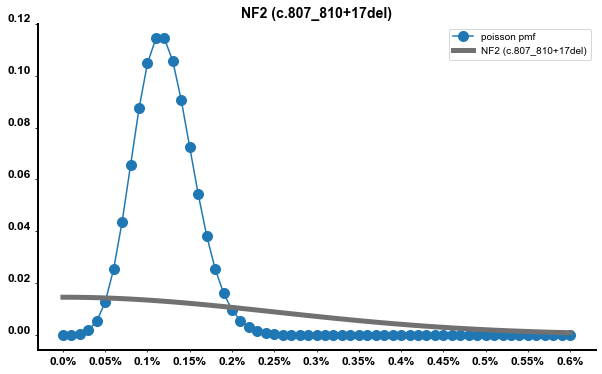

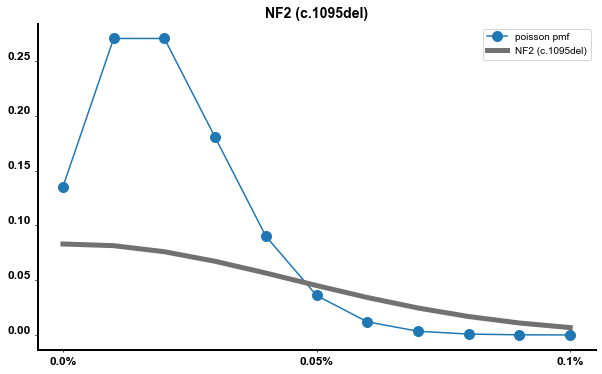

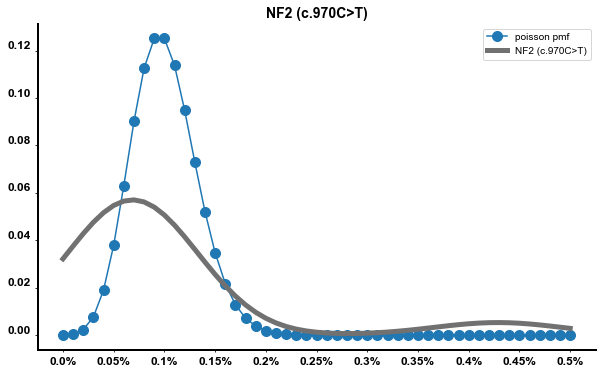

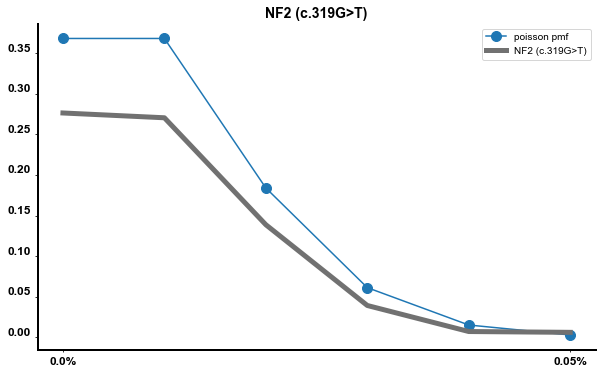

In [8]:
def POISSON_RANGE ( col_series, mu, title ):
    from scipy.stats import poisson
    from scipy.stats import kde
    import matplotlib.pyplot as plt
    import palettable, math

    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

    fig, ax_poisson = plt.subplots( figsize=(10, 6) )
    ax_poisson.set_title ( title, fontdict = {"fontsize" : 14, "fontweight" : "semibold"} )

    depth = 10000
    error_alt_mean = round (mu * depth)

    x = np.arange (0, error_alt_mean * 5 + 1 , 1)
    ax_poisson.plot(x, poisson.pmf(x, error_alt_mean), '-o', ms = 10, label='poisson pmf')

    ax_poisson.set_xticks ( np.arange (0, error_alt_mean * 5 + 1 , 5  ) )
    ax_poisson.set_xticklabels ( [ str( int (label.get_text()) / (depth / 100) ) + "%" for label in ax_poisson.get_xticklabels()]  ,  fontdict = {"fontsize" : 12, "fontweight" : "semibold"},  ha = "center"  )
    ax_poisson.tick_params( axis = 'x', pad = 5, length = 2, rotation = 00  )
    
    ax_poisson.set_yticklabels ( [str(i.get_text()) for i in ax_poisson.get_yticklabels() ] , fontdict = {"fontsize" : 12, "fontweight" : "semibold"}, va = 'bottom' )
    

    for axis in ['left','bottom']:
        ax_poisson.spines[axis].set_linewidth(2)
    for axis in ['right','top']:
        ax_poisson.spines[axis].set_linewidth(0)


    col_remove_nan = np.array ( col_series [ ~np.isnan (  np.array( col_series ) ) ] )
    
    try:
        kde = kde.gaussian_kde( col_remove_nan * depth) 
        #print ( col, round ( mu * 100, 2), col_remove_nan * 100 )
        y = kde ( x )
        ax_poisson.plot(x , y, color = Gr_10[10], linewidth = 5, label = "{}".format( title ))
    except:
        x = x
        #print (col_remove_nan)

    ax_poisson.legend()

    # 한줄씩 0 (outlier), 1 (gray zone), 2 (definite background)를 채워주기.  
    check = [0] * len (col_series)
    for row_i in range ( len(col_series) ):
        row = col_series.index [row_i]
        value = col_series.iloc[row_i]
        if math.isnan( value ) == False:
            #print ( "{} - {} : {}".format ( title, row, poisson.cdf( value * depth, error_alt_mean)  ) )
            if poisson.cdf( value * depth, error_alt_mean) > 0.999:
                check [row_i] = 0
            elif poisson.cdf( value * depth, error_alt_mean) > 0.5:
                check [row_i] = 1
            else:
                check [row_i] = 2
        else:
            check [row_i] = 2

    return check
                        


df_multiplex_err_range = pd.DataFrame ( index = vaf_df_multiplex_with_nan.index, columns = vaf_df_multiplex_with_nan.columns )
df_multiplex_err_range.loc [:, :] = 0

for col_i, col in enumerate (df_multiplex_err_range.columns):
    #print ( vaf_df_multiplex_with_nan.loc [:, col],  vaf_df_multiplex_with_nan.loc [:, col].mean() )
    check = POISSON_RANGE ( vaf_df_multiplex_with_nan.loc [:, col],  mu = vaf_df_multiplex_with_nan.loc [:, col].mean(), title = col )
    df_multiplex_err_range.iloc [:, col_i]   = check

df_multiplex_err_range
df_multiplex_err_range_reverse = df_multiplex_err_range.iloc [ ::-1 ,  ]
df_multiplex_err_range_reverse 

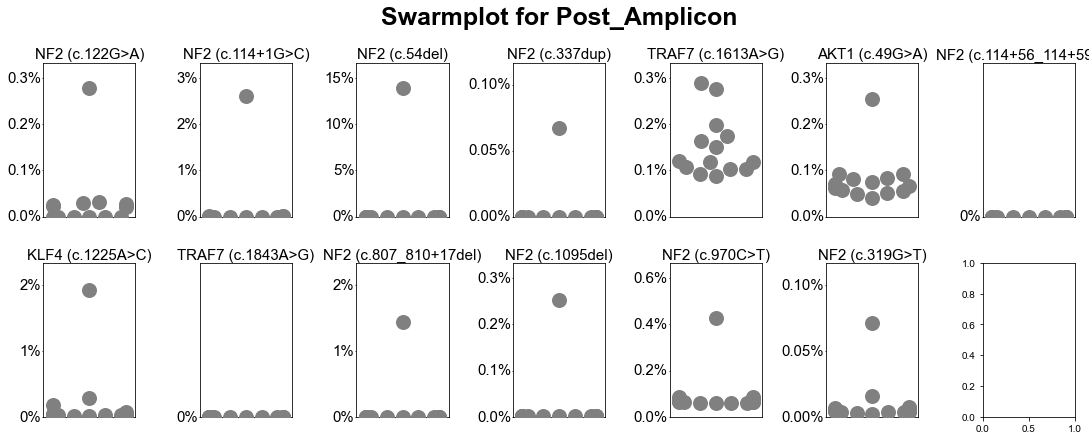

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
plt.rcParams["font.family"] = 'arial'

SUPTITLE = "Swarmplot for Post_Amplicon"
NUM_ROW = 2
NUM_COLUMN = int ( np.ceil ( vaf_df_multiplex.shape[1] / NUM_ROW ) )
DENOMINATOR = 1

fig, ax = plt.subplots ( nrows = NUM_ROW, ncols = NUM_COLUMN , figsize =(15.92 / DENOMINATOR, 6 / DENOMINATOR))
fig.subplots_adjust ( wspace = 0.7, hspace = 0.3, bottom = 0.03, top = 0.85, left = 0.05, right = 0.95)

fig.suptitle ( SUPTITLE, fontsize = 25/DENOMINATOR, fontweight = "bold", ha = "center")


for pos_name_index, pos_name in enumerate (vaf_df_multiplex.columns):
    row_index = int ( pos_name_index  /   NUM_COLUMN) 
    col_index = int ( pos_name_index  %   NUM_COLUMN) 


    sns.swarmplot ( vaf_df_multiplex.loc[:, pos_name] * 100, s = 15/DENOMINATOR, c = "gray",  ax = ax[ row_index, col_index ])    

    #1. Label
    ax[ row_index, col_index ].set_xlabel ( ax[ row_index, col_index ].get_ylabel(), fontsize = 15/DENOMINATOR )
    ax[ row_index, col_index ].xaxis.set_label_position('top')
    ax[ row_index, col_index ].set_ylabel ( "" )

    #2. Scope
    xmin, xmax, ymin, ymax = ax[ row_index, col_index ].axis()
    ymax = max(vaf_df_multiplex.loc[:, pos_name] * 100)
    
    if ymin < 0:
        ax[ row_index, col_index ].set_ylim ( 0, ymax)


    #3. Ticks
    ax[ row_index, col_index ].set_xticks([])

    if ymax > 9:
        YTICKS_INTERVAL = 5
    elif ymax > 3:
        YTICKS_INTERVAL = 2.5
    elif ymax > 1:
        YTICKS_INTERVAL = 1
    elif ymax > 0.5:
        YTICKS_INTERVAL = 0.25
    elif ymax > 0.3:
        YTICKS_INTERVAL = 0.2
    elif ymax > 0.2:
        YTICKS_INTERVAL = 0.1
    else:
        YTICKS_INTERVAL = 0.05


    ax[ row_index, col_index ].set_yticks(np.arange (0, int ( np.ceil(ymax / YTICKS_INTERVAL) ) * YTICKS_INTERVAL + 0.01, YTICKS_INTERVAL)  )
    ax[ row_index, col_index ].set_ylim ( 0, int ( np.ceil(ymax / YTICKS_INTERVAL) ) * YTICKS_INTERVAL + (YTICKS_INTERVAL / 3) )  # y축 끝에 약간의 여유를 주기 위함

    ax[ row_index, col_index ].set_yticklabels( [ i.get_text() + "%" for i in ax[ row_index, col_index ].get_yticklabels()] , va = 'center'   )
    ax[ row_index, col_index ].tick_params( axis = 'y', pad = 1, length = 1, labelsize = 15/DENOMINATOR )

fig.savefig ( "/data/project/Meningioma/51.Amplicon/02.multiplex/07.pysam/Dura_post_swarmplot.pdf", dpi = 300)

## WES-dura와 merge heatmap 그려보기
-  vaf_df_multiplex_with_nan
- /data/project/Meningioma/07.pysam/Dura_count_df.tsv

In [25]:
df_WES_tumor.loc [ ["190426_Tumor_PT", "220930_Tumor", "221026_Tumor", "221102_Tumor", "221202_Tumor", "230127_Tumor", "230127_Tumor", "230303_1_Tumor", "230405_Tumor", "230323_Tumor", "230419_Tumor", "230419_Tumor", "230419_Tumor", "230526_Tumor", "230822_Tumor", "230920_Tumor" ], : ]

new_colname,NF2 (c.122G>A),NF2 (c.114+1G>C),NF2 (c.54del),NF2 (c.337dup),TRAF7 (c.1613A>G),AKT1 (c.49G>A),NF2 (c.114+56_114+59dup),KLF4 (c.1225A>C),TRAF7 (c.1843A>G),NF2 (c.807_810+17del),NF2 (c.1095del),NF2 (c.970C>T),NF2 (c.319G>T)
190426_Tumor_PT,0.580645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
220930_Tumor,0.000000,0.469799,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
221026_Tumor,0.000000,0.000000,0.373737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
221102_Tumor,0.000000,0.000000,0.000000,0.485714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
221202_Tumor,0.000000,0.000000,0.000000,0.000000,0.396396,0.421687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
230127_Tumor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.526316,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
230127_Tumor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.526316,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
230303_1_Tumor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352941,0.401709,0.000000,0.000000,0.000000,0.0
230405_Tumor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.356522,0.345679,0.000000,0.000000,0.000000,0.0
230323_Tumor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265306,0.000000,0.000000,0.0


In [26]:
df_WES_dura.loc [ ["190426_Dura", "220930_Dura", "221026_Dura", "221102_Dura", "221202_Dura", "230127_Dura", "230127_Cortex", "230303_1_Dura", "230405_Dura", "230323_Dura", "230419_Dura", "230419_Ventricle", "230419_Cortex", "230526_Dura", "230822_Dura", "230920_Dura" ]  ]

new_colname,NF2 (c.122G>A),NF2 (c.114+1G>C),NF2 (c.54del),NF2 (c.337dup),TRAF7 (c.1613A>G),AKT1 (c.49G>A),NF2 (c.114+56_114+59dup),KLF4 (c.1225A>C),TRAF7 (c.1843A>G),NF2 (c.807_810+17del),NF2 (c.1095del),NF2 (c.970C>T),NF2 (c.319G>T)
190426_Dura,0.084746,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
220930_Dura,0.000000,0.069536,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
221026_Dura,0.000000,0.000000,0.207469,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
221102_Dura,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
221202_Dura,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
230127_Dura,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
230127_Cortex,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
230303_1_Dura,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
230405_Dura,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.017699,0.030435,0.000000,0.000000,0.000000,0.0
230323_Dura,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.059829,0.000000,0.000000,0.0


In [27]:
vaf_df_multiplex_with_nan.loc [ ["190426_Dura", "220930_Dura", "221026_Dura", "221102_Dura", "221202_Dura", "230127_Dura", "230127_Cortex", "230303_1_Dura", "230405_Dura", "230323_Dura", "230419_Dura", "230419_Ventricle", "230419_Cortex", "230526_Dura", "230822_Dura", "230920_Dura" ]  ]

new_colname,NF2 (c.122G>A),NF2 (c.114+1G>C),NF2 (c.54del),NF2 (c.337dup),TRAF7 (c.1613A>G),AKT1 (c.49G>A),NF2 (c.114+56_114+59dup),KLF4 (c.1225A>C),TRAF7 (c.1843A>G),NF2 (c.807_810+17del),NF2 (c.1095del),NF2 (c.970C>T),NF2 (c.319G>T)
190426_Dura,0.002775,0.000000,0.000000,0.000000,0.000881,0.000753,0.0,0.000251,0.0,0.000010,0.000017,0.000674,0.000024
220930_Dura,0.000308,0.026000,0.000000,0.000000,0.001199,0.000503,0.0,0.000205,0.0,0.000003,0.000010,0.000715,0.000161
221026_Dura,0.000000,0.000005,0.139649,0.000000,0.001025,0.000401,0.0,0.001856,0.0,0.000005,0.000009,0.000607,0.000045
221102_Dura,0.000204,0.000000,0.000000,0.000672,0.001184,0.000708,0.0,0.000362,0.0,0.000002,0.000014,0.000621,0.000043
221202_Dura,0.000000,0.000000,0.000000,0.000000,0.002882,0.002550,0.0,0.000468,0.0,0.000006,0.000016,0.000619,0.000034
230127_Dura,0.000000,0.000000,0.000000,0.000000,0.001070,0.000489,0.0,0.000305,0.0,0.000008,0.000019,0.000657,0.000035
230127_Cortex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230303_1_Dura,0.000000,0.000024,0.000000,0.000000,0.001037,0.000585,0.0,0.002835,0.0,0.000008,0.000019,0.000681,0.000027
230405_Dura,0.000000,0.000000,0.000000,0.000000,0.001626,0.000927,0.0,0.019174,0.0,0.000012,0.000013,0.000876,0.000046
230323_Dura,0.000295,0.000000,0.000000,0.000000,0.001510,0.000804,0.0,0.000215,0.0,0.014305,0.000011,0.000871,0.000035


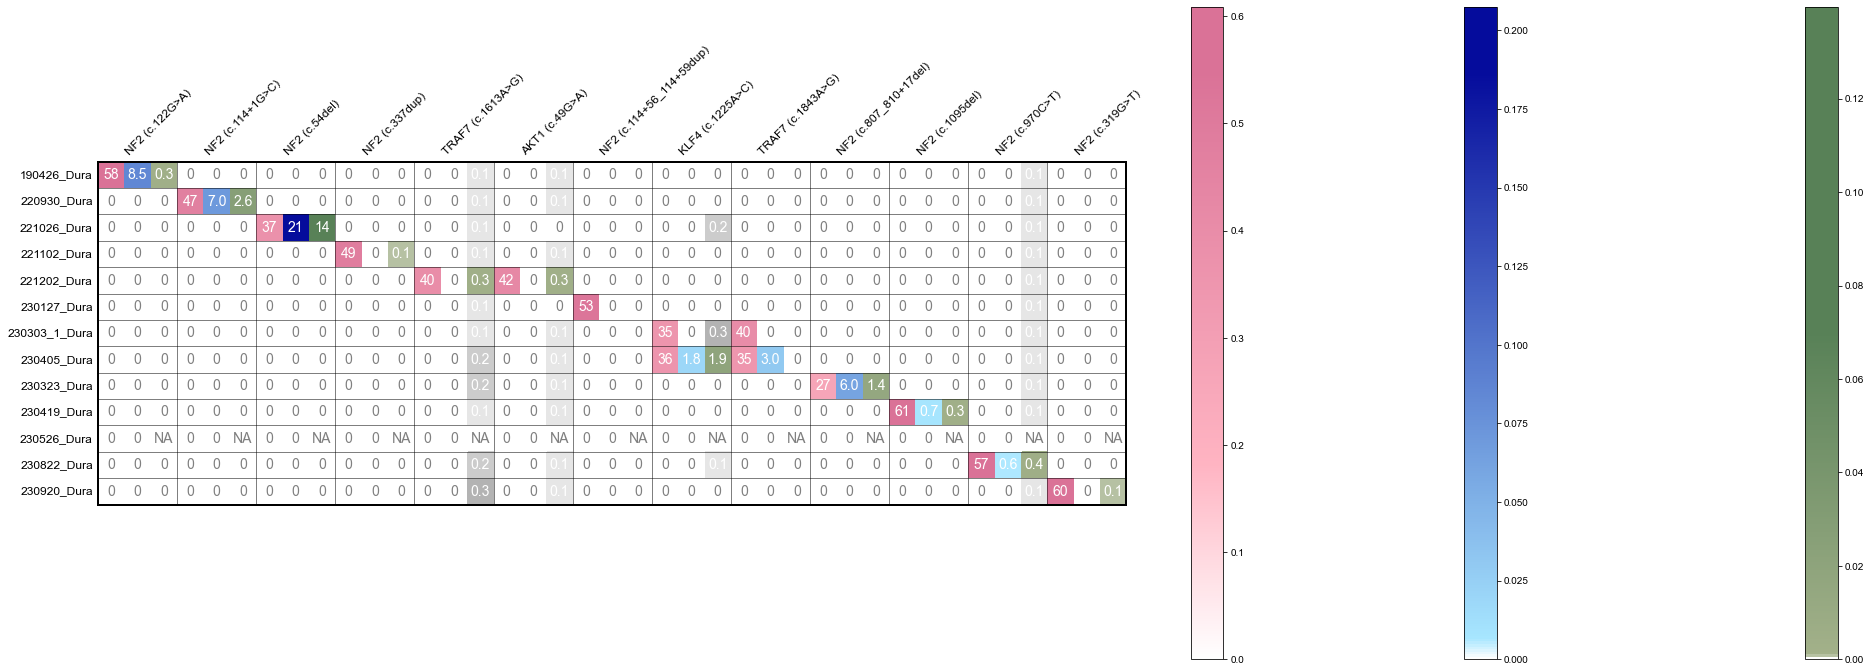

In [13]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = 'arial'

Tumor_order = ["190426_Tumor_PT", "220930_Tumor", "221026_Tumor", "221102_Tumor", "221202_Tumor", "230127_Tumor",  "230303_1_Tumor", "230405_Tumor", "230323_Tumor", "230419_Tumor", "230526_Tumor", "230822_Tumor", "230920_Tumor" ]
Dura_order = ["190426_Dura", "220930_Dura", "221026_Dura", "221102_Dura", "221202_Dura", "230127_Dura", "230303_1_Dura", "230405_Dura", "230323_Dura", "230419_Dura",  "230526_Dura", "230822_Dura", "230920_Dura" ]

t = np.array ( df_WES_tumor.loc [ Tumor_order, : ].iloc[ ::-1 ,  ]  ) 
a = np.array ( df_WES_dura.loc [ Dura_order  ].iloc[ ::-1 ,  ]  ) 
b = np.array ( vaf_df_multiplex_with_nan.loc [ Dura_order  ].iloc[ ::-1 ,  ]   ) 
vmint, vmaxt = np.nanmin( t ), np.nanmax( t )
vmina, vmaxa = np.nanmin( a ), np.nanmax( a )
vminb, vmaxb  = np.nanmin( b) , np.nanmax( b )

def VALUE_ROUND_np ( vaf_np ):
    #vaf_np =  vaf_np  * 100
    vaf_np =  np.round(vaf_np, 3)
    return vaf_np
t_ROUND = VALUE_ROUND_np (t)
a_ROUND = VALUE_ROUND_np (a)
b_ROUND = VALUE_ROUND_np (b)


# Create the colormap
positions = [0, 0.3, 0.9, 1]  # Define the positions for each color
cmap_t = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, [ "white", "#FFB4C2", "#DA7297", "#DA7297" ] )) )
positions = [0, 0.03, 0.9, 1]  # Define the positions for each color
cmap_a = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, [ "white", "#A7E6FF", "#050C9C", "#050C9C" ] )) )
positions = [0, 0.005, 0.5, 1]  # Define the positions for each color
cmap_b= LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, [ "white", "#A3B18A", "#588157", "#588157" ] )))

cmap99 = LinearSegmentedColormap.from_list('custom_cmap', list(zip( [0 , 0.8, 1], [ "white", "#333333",  "black" ] )))  
fig, ax3 = plt.subplots( figsize=(36, 12) )


def VALUE_ROUND (value):
    import math
    if math.isnan (value) == True:
        return math.nan
    if value > 0.1:
        return round (value * 100)
    elif value > 0.0005:
        return round (value * 100 , 1)
    else:
        return 0


def TEXT_ANNOT ( value ):
    import math
    if  value == 0:
        return str(0), "gray"
    elif math.isnan (value) == True:
        return str("NA"), "gray"
    else:
        return value, "white"


for col_i in range(a.shape[1]):       # 각 column별로 heatmap 그리기
    # ax3.imshow( a_ROUND  [ : , col_i : col_i + 1 ]   , extent = [ 2 * col_i - 0.5, 2 * col_i + 0.5, - 0.5, a.shape[0] - 0.5 ],
    #            cmap = cmap1, interpolation = 'nearest', origin = 'lower', vmin = vmina, vmax = vmaxa )
    # ax3.imshow( b_ROUND  [ : , col_i : col_i + 1 ]  , extent = [2 * col_i +0.5, 2 * col_i +1.5, - 0.5, a.shape[0] - 0.5 ],
    #            cmap = cmap2, origin = 'lower', vmin = vminb, vmax = vmaxb) # interpolation = 'nearest', 

    for row_i in range (a.shape[0]):     
        # draw WES_tumor
        ax3.imshow( t_ROUND  [ row_i : row_i + 1 , col_i : col_i + 1 ]   , extent = [ 3 * col_i - 0.5, 3 * col_i + 0.5, row_i - 0.5, row_i + 0.5 ],
                cmap = cmap_t, interpolation = 'nearest', origin = 'lower', vmin = vmint, vmax = vmaxt )
        
        # draw WES_dura
        ax3.imshow( a_ROUND  [ row_i : row_i + 1 , col_i : col_i + 1 ]   , extent = [ 3 * col_i + 0.5, 3 * col_i + 1.5, row_i - 0.5, row_i + 0.5 ],
                cmap = cmap_a, interpolation = 'nearest', origin = 'lower', vmin = vmina, vmax = vmaxa )
        
        # draw amplicon_dura
        if df_multiplex_err_range.iloc[:, col_i ].loc [ Dura_order [::-1][ row_i] ]  in [0]:
            ax3.imshow( b_ROUND  [ row_i : row_i  + 1 , col_i : col_i + 1 ]  , extent = [3 * col_i + 1.5, 3 * col_i + 2.5, row_i - 0.5, row_i + 0.5 ],
                    cmap = cmap_b, interpolation = 'nearest', origin = 'lower', vmin = vminb, vmax = vmaxb) 
        else:          # 문제있는 부분은 까맣게 처리
            ax3.imshow( b_ROUND  [ row_i : row_i  + 1 , col_i : col_i + 1 ]  , extent = [3 * col_i + 1.5, 3 * col_i +2.5, row_i - 0.5, row_i + 0.5 ],
                    cmap = cmap99,  interpolation = 'nearest', origin = 'lower', vmin = 0, vmax = 0.01) 

        

        value_t, color_t = TEXT_ANNOT ( round(  t[ row_i, col_i] * 100 )  )
        value_a, color_a = TEXT_ANNOT ( VALUE_ROUND(  a[ row_i, col_i] )  )
        value_b, color_b = TEXT_ANNOT ( VALUE_ROUND(  b[ row_i, col_i] )  )

        ax3.text( col_i * 3, row_i , value_t  ,  ha="center", va="center", color = color_t, fontdict = {"fontsize" : 14, "fontweight" : "normal"} )
        ax3.text( col_i * 3 + 1, row_i , value_a  ,  ha="center", va="center", color = color_a, fontdict = {"fontsize" : 14, "fontweight" : "normal"} )
        ax3.text( col_i * 3 + 2, row_i , value_b,  ha="center", va="center", color = color_b, fontdict = {"fontsize" : 14, "fontweight" : "normal"} )
 

# ax.hlines(y = np.arange(0, 10)+0.5, xmin=np.full(10, 0)-0.5, xmax=np.full(10, 10)-0.5, color="black")
ax3.set_xlim(-0.5, 3 * a.shape[1] - 0.5 )
ax3.set_ylim( -0.5, a.shape[0] - 0.5  )

# Grid 일일이 그려주기
ax3.vlines(x =np.arange (-0.5, 3 * a.shape[1] - 0.5, 3),  ymin = -0.5 , ymax = a.shape[0] - 0.5 , color="black", linewidth = 0.5 )
ax3.hlines(y =np.arange (-0.5, a.shape[0] - 0.5, 1),  xmin = -0.5 , xmax = 3 * a.shape[1] - 0.5 , color="black", linewidth = 0.5 )

#ax3.hlines(y  = 2.5,  xmin = -0.5 , xmax = 3 * a.shape[1] - 0.5 , color="black", linewidth = 2, linestyle = "--" )


ax3.set_xticks ( [i + 0.5 for i in range (0, vaf_df_multiplex_with_nan.shape[1] * 3 , 3 ) ]  )
ax3.set_xticklabels ( [str(i) for i in vaf_df_multiplex_with_nan.columns ] ,  fontdict = {"fontsize" : 12, "fontweight" : "normal"} ,  ha = 'left')
ax3.tick_params( axis = 'x',  pad = 5, length = 0, rotation = 45  )
ax3.xaxis.set_label_position('top')
ax3.xaxis.set_ticks_position('top')

ax3.set_yticks ( np.arange (0, vaf_df_multiplex_with_nan.shape[0], 1 )  )
ax3.set_yticklabels ( Dura_order [::-1] , fontdict = {"fontsize" : 12, "fontweight" : "normal"}, va = 'center' )
ax3.tick_params( axis = 'y', pad = 5, length = 0  )

for axis in ['left','bottom', 'right', 'top']:
    ax3.spines[axis].set_linewidth(2)

sm_t = plt.cm.ScalarMappable(cmap = cmap_t , norm=plt.Normalize(vmin = vmint, vmax = vmaxt ) )
sm_a = plt.cm.ScalarMappable(cmap = cmap_a , norm=plt.Normalize(vmin = vmina, vmax = vmaxa ) )
sm_b = plt.cm.ScalarMappable(cmap = cmap_b , norm=plt.Normalize(vmin = vminb, vmax = vmaxb ) )
plt.colorbar( sm_b )
plt.colorbar( sm_a )
plt.colorbar( sm_t )

fig.savefig ( "/data/project/Meningioma/51.Amplicon/02.multiplex/07.pysam/Dura_post_merged_heatmap.pdf", dpi = 300)

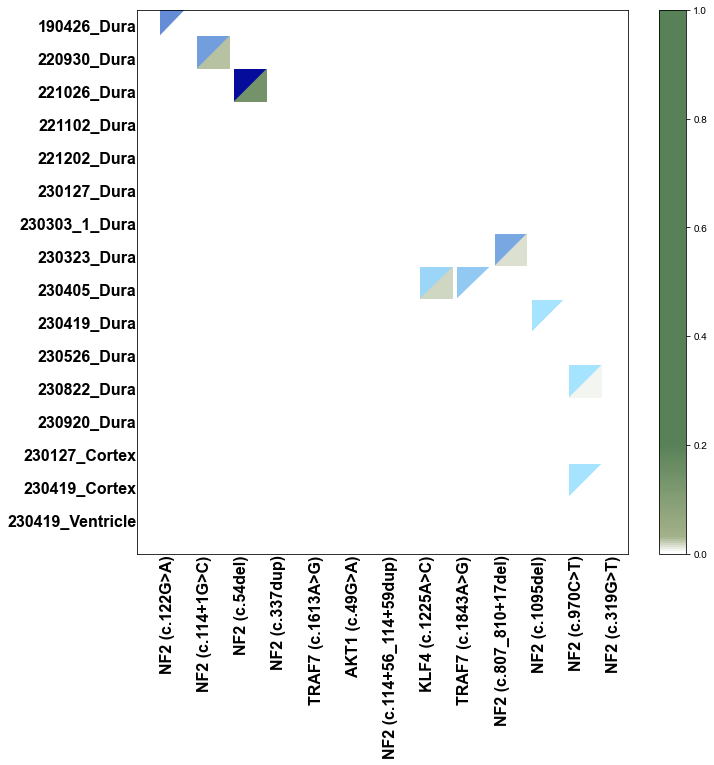

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def getCustomSymbol1(path_index=1):
  if path_index==1:  #upper triangle
      verts = [
      (0.0,0.0),
      (0.0,1.0),
      (1.0,1.0),
      (0.0,0.0),]
  else:              #lower triangle
           verts = [
      (0.0,0.0),
      (1.0,0.0),
      (1.0,1.0),
      (0.0,0.0),]

  codes = [matplotlib.path.Path.MOVETO,   matplotlib.path.Path.LINETO,   matplotlib.path.Path.LINETO,  matplotlib.path.Path.CLOSEPOLY,    ] 
  pathCS1 = matplotlib.path.Path(verts, codes)
  return pathCS1, verts

def plot_mat( ax, cmap, matrix , path_index = 1, alpha = 1.0, vmin = 0 , vmax = 1 ):

    X, Y, values = zip(*[ (i,j,matrix[i,j]) for i in range( matrix.shape[0] ) for j in range( matrix.shape[1] ) ] )

    marker, verts = getCustomSymbol1(path_index = path_index)

    ax.scatter(X, Y, s = 4000,  marker = marker,  c = values, 
                          cmap = cmap,   alpha = alpha, 
                        vmin=vmin, vmax=vmax )
    return ax

###################################

DENOMINATOR = 1
fig, ax = plt.subplots ( nrows = 1, ncols = 1, figsize =(11 / DENOMINATOR, 10 / DENOMINATOR))
ax.xaxis.set_label_position('top')
# Create the colormap
positions = [0, 0.001, 0.2, 1]  # Define the positions for each color
cmap1 = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, [ "white", "#A7E6FF", "#050C9C", "#050C9C" ] )))
positions = [0, 0.03, 0.2, 1]  # Define the positions for each color
cmap2 = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, [ "white", "#A3B18A", "#588157", "#588157" ] )))



A  = np.array ( df_WES_dura.T.iloc[:, ::-1] )
B  = np.array ( vaf_df_multiplex_with_nan.T.iloc[:, ::-1]  ) 

vmin, vmax = np.min([A,B]), np.max([A,B])
vmin, vmax = 0, 1

ax = plot_mat(path_index = 1, cmap = cmap1, alpha = 1.0, vmin = vmin, vmax = vmax, matrix = A, ax = ax)
ax = plot_mat(path_index = 2, cmap = cmap2, alpha = 1.0, vmin = vmin, vmax = vmax, matrix = B, ax = ax)

ax.set_xticks ( np.arange (0, df_WES_dura.T.iloc[:, ::-1].shape[0], 1 ) )
ax.set_xticklabels ( [str(i) for i in df_WES_dura.T.iloc[:, ::-1].index ] ,  fontdict = {"fontsize" : 16, "fontweight" : "semibold"},  ha = "left"  )
ax.tick_params( axis = 'x', pad = 1, length = 0, rotation = 90  )


ax.set_yticks ( np.arange (0, df_WES_dura.T.iloc[:, ::-1].shape[1], 1 ) )
ax.set_yticklabels ( [str(i) for i in df_WES_dura.T.iloc[:, ::-1].columns ] , fontdict = {"fontsize" : 16, "fontweight" : "semibold"}, va = 'bottom' )
ax.tick_params( axis = 'y', pad = 1, length = 0  )


 # for the colorbar i did the trick to make first a fake mappable:
sm = plt.cm.ScalarMappable(cmap = cmap2 , norm=plt.Normalize(vmin=vmin, vmax=vmax ) )
sm._A=[]
plt.colorbar( sm )

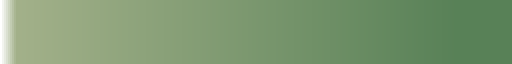

In [157]:
positions = [0, 0.03, 0.9, 1]  # Define the positions for each color
cmap2 = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, [ "white", "#A3B18A", "#588157", "#588157" ] )))
cmap2

In [80]:
# ax1.imshow(a, cmap = cmap1, interpolation='nearest', origin='lower', vmin=vmina, vmax=vmaxa)
# ax1.set_xticks(np.arange(.5, a.shape[1]-1, 1), minor=True)
# ax1.set_yticks(np.arange(.5, a.shape[0]-1, 1), minor=True)

# ax1.set_xticks ( np.arange (0, df_WES_dura.shape[1], 1 ) )
# ax1.set_xticklabels ( [str(i) for i in df_WES_dura.columns ] ,  fontdict = {"fontsize" : 12, "fontweight" : "semibold"},  ha = "left"  )
# ax1.tick_params( axis = 'x', pad = 1, length = 0, rotation = 90  )
# ax1.set_yticks ( np.arange (0, df_WES_dura.shape[0], 1 ) )
# ax1.set_yticklabels ( [str(i) for i in df_WES_dura.iloc[ ::-1 ,  ].index ] , fontdict = {"fontsize" : 12, "fontweight" : "semibold"}, va = 'bottom' )
# ax1.tick_params( axis = 'y', pad = 1, length = 0  )


# # ax2
# ax2.imshow(b, cmap = cmap2, interpolation='nearest', origin='lower', vmin=vminb, vmax=vmaxb)
# ax2.set_xticks(np.arange(.5, a.shape[1]-1, 1), minor=True)
# ax2.set_yticks(np.arange(.5, a.shape[0]-1, 1), minor=True)

# ax2.set_xticks ( np.arange (0, vaf_df_multiplex_with_nan.shape[1], 1 ) )
# ax2.set_xticklabels ( [str(i) for i in vaf_df_multiplex_with_nan.columns ] ,  fontdict = {"fontsize" : 12, "fontweight" : "semibold"},  ha = "left"  )
# ax2.tick_params( axis = 'x', pad = 1, length = 0, rotation = 90  )
# ax2.set_yticks ( np.arange (0, vaf_df_multiplex_with_nan.shape[0], 1 ) )
# ax2.set_yticklabels ( [str(i) for i in vaf_df_multiplex_with_nan.iloc[ ::-1 ,  ].index ] , fontdict = {"fontsize" : 12, "fontweight" : "semibold"}, va = 'bottom' )
# ax2.tick_params( axis = 'y', pad = 1, length = 0  )

#, annot = vaf_df, annot_kws={"size": 25 / np.sqrt(len(vaf_df))}

# 둘을 합친 것을 그린다
#extent = (0, a.shape[1] * 2, a.shape[0], 0)


0.9928134953961456